In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression(object):
    def __init__(self,seed=None):
        np.random.seed(seed if seed is not None else np.random.randint(100))
        self.W = None
        self.b = None
        self.length = None
        self.m = None
        self.costs = []
        self.iterations = []
        
    def initialize_weights_and_bais(self):
        """
        Randomly generating weights 
        """
        self.W = np.random.randn(self.length) #(n,1)
        self.b = 0
        
    def computeCost(self,h,Y):
        """Mean Squared Error"""
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.m)
        return cost

    def optimize(self,X,Y,lr=None):
        """
        Optimizing step for weight and bias
        """
        h = self.predict(X)
        dW = np.dot( X.T, (h-Y) ) / self.m
        db = np.sum( h-Y )  / self.m
        self.W = self.W - lr*dW
        self.b = self.b - lr*db
    
    def fit(self, X, y, lr=1e-5, tol=0.01, verbose=True):
        """
        Initialize weights and optimize them using multiple iterations
        """
        self.m,self.length = X.shape
        self.initialize_weights_and_bais()
        last_cost,i = float('inf'),0
        while True:
            h = self.predict(X)
            cost = self.computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.optimize(X,y,lr=lr)
            if last_cost-cost < tol: break
            else: last_cost,i = cost,i+1
            self.costs.append(cost)
            self.iterations.append(i)
            
    def predict(self,X):
        """
        Prediction for X
        """
        return np.dot(X,self.W)+self.b
    
    def plot(self,figsize=(7,5)):
        """
        Interation vs Cost
        """
        plt.figure(figsize=figsize)
        plt.plot(self.iterations,self.costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()
        
    def score(self,X,y):
        """r2 : 1-ESS/TSS"""
        return 1-(np.sum(((self.predict(X) - y)**2))/np.sum((y-np.mean(y))**2))
        
    @property
    def weights(self): return self.W
    
    @property
    def bias(self): return self.b

$ output(h) =  X.W + b $

$ cost(J) = \frac{1}{2*m} \sum_{i=1}^m (h-Y)^2  $

$ \large \frac{dJ}{dw} = \frac{1}{m} \small (X^{T} . (h-Y)) $

$ \large \frac{dJ}{db} = \frac{1}{m} \small \sum (h-Y) $

In [2]:
def normalize(X): return (X-X.mean(axis=0))/X.std(axis=0)

def train_test_split(X,Y,test_size=None,seed=5):
    """
    Custom Train Test split function
    """
    assert test_size!=None, "test_size cannot be None"
    np.random.seed(seed)
    indexes = np.random.choice([False,True],size=len(X),p=[test_size,1-test_size])
    return X[indexes],X[~indexes],Y[indexes],Y[~indexes]

In [3]:
def root_mean_squared_error(Y,y):
    """
    Args
    Y : predicted
    y : True labels
    """
    loss = np.square(Y-y)
    cost = np.sqrt(np.sum(loss)/(2*len(y)))
    return cost

In [4]:
data = pd.read_csv('data.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
X = data.drop('medv',axis=1).values
Y = data['medv'].values
X.shape,Y.shape

((506, 13), (506,))

In [6]:
X = normalize(X)  #normalizing data

X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.3,seed=7)
X_train.shape,X_val.shape,Y_train.shape,Y_val.shape

((355, 13), (151, 13), (355,), (151,))

In [7]:
lr = LinearRegression(seed=5)
lr.fit(X_train,Y_train,lr=0.1,verbose=False)
lr.score(X_val,Y_val)

0.6343213909415806

In [8]:
root_mean_squared_error( lr.predict(X_val), Y_val )

3.610928032691001

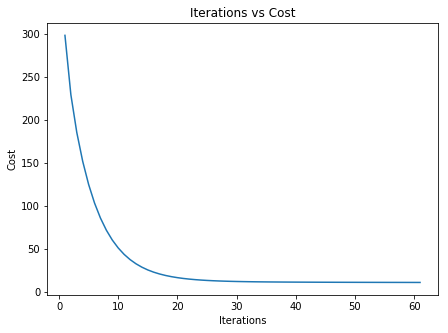

In [9]:
lr.plot()

In [10]:
lr.weights

array([-0.56805872,  0.59795349,  0.57646615,  0.59123983, -1.56443688,
        3.64062055, -0.16614372, -2.23022711,  1.2855218 , -0.89820358,
       -2.03540025,  1.04313723, -3.65778775])

In [11]:
lr.bias

22.533119882762424